In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from pandas import Series , DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics 
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score

In [2]:
data=pd.read_csv(r'C:\Users\my_Folder\Downloads\churn-data corelation.csv')

In [3]:
data

,Gender,Age,Payment Method,Churn,LastTransaction,Gender.1,Payment,Age.1,Churn.1
0,male,64,credit card,loyal,98,0,0,64,0
1,male,35,cheque,churn,118,0,1,35,1
2,female,25,credit card,loyal,107,1,0,25,0
3,male,39,credit card,loyal,90,0,0,39,0
4,female,28,cheque,churn,189,1,1,28,1
...,...,...,...,...,...,...,...,...,...
895,male,19,credit card,loyal,92,0,0,19,0
896,female,29,credit card,loyal,33,1,0,29,0
897,male,84,credit card,loyal,124,0,0,84,0
898,male,19,credit card,loyal,49,0,0,19,0


In [4]:
data.isnull().sum()

Gender             0
Age                0
Payment Method     0
Churn              0
LastTransaction    0
Gender.1           0
Payment            0
Age.1              0
Churn.1            0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

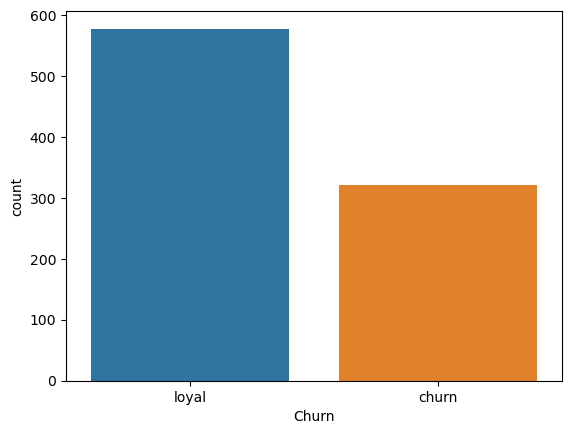

In [5]:
sns.countplot(x='Churn',data=data) #imbalanced dataset

<Axes: xlabel='Payment Method', ylabel='count'>

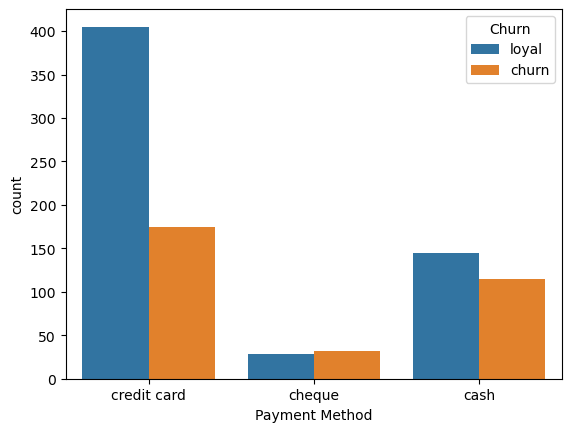

In [6]:
sns.countplot(x='Payment Method',hue='Churn',data=data) #interrelation of payment method with the target variable
#hue just for categotical data

In [7]:
data['Payment Method'].value_counts() #we have observed above that more people having credit cards are loyal, how ever this is
# because more people in the dataset are owning credit cards than the other catergories so we can conclude people tend to be more
# interested in taking credit cards and doing their payment methods however it does  not signify more people having credit cards
#are loyal.
# when we get a particular pattern with respect to the different catergories of a column vs. the target variable, before 
#concluding the predominent catergory we have to see how is the distribution(count) of the different elements in the dataset

credit card    580
cash           260
cheque          60
Name: Payment Method, dtype: int64

In [8]:
data.corr()

C:\Users\FARRUKH SIDDIQUI\AppData\Local\Temp\ipykernel_14552\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,LastTransaction,Gender.1,Payment,Age.1,Churn.1
Age,1.000000,0.302295,-0.024784,0.091954,1.000000,0.179804
LastTransaction,0.302295,1.000000,0.207216,0.268922,0.302295,0.314502
Gender.1,-0.024784,0.207216,1.000000,-0.025570,-0.024784,0.569976
Payment,0.091954,0.268922,-0.025570,1.000000,0.091954,0.140606
Age.1,1.000000,0.302295,-0.024784,0.091954,1.000000,0.179804
Churn.1,0.179804,0.314502,0.569976,0.140606,0.179804,1.000000


C:\Users\FARRUKH SIDDIQUI\AppData\Local\Temp\ipykernel_14552\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

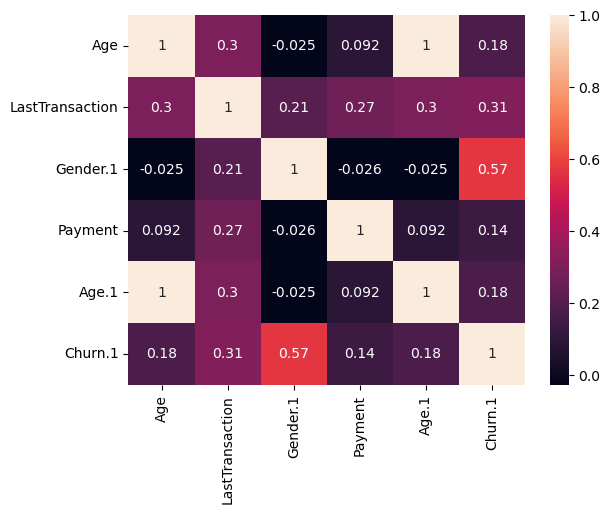

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
# x or independant columns comprises of the 4th,5th, 6th and 7th columns starting from 0 and y  or dependant varibale comprises of 8th
#column
x=data.iloc[:, 4:8].values #iloc function helps to index particular records to consider, here we are considering all rows and
#4th,5th,6th and 7th columns 
y=data.iloc[:,8:9].values

In [11]:
x

array([[ 98,   0,   0,  64],
       [118,   0,   1,  35],
       [107,   1,   0,  25],
       ...,
       [124,   0,   0,  84],
       [ 49,   0,   0,  19],
       [ 25,   1,   0,  24]], dtype=int64)

In [12]:
y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [13]:
# now that we have extracted and divided x and y from the whole dataset we will do train test split and the apply 1st linear 
#regression model, then logistic regression model with the same train test split, then we will check the accuracy score for both
# the models

In [14]:
df_x = pd.DataFrame(x, columns = ['LastTransaction','Gender.1','Payment','Age.1'])
df_y = pd.DataFrame(y, columns = ['Churn.1'])

In [15]:
#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2,random_state=0)

In [16]:
x_test

,LastTransaction,Gender.1,Payment,Age.1
492,172,1,0,33
141,134,1,2,32
409,140,0,2,43
31,173,1,2,18
570,147,0,2,52
...,...,...,...,...
408,91,0,0,37
75,118,0,0,31
778,47,1,0,55
202,75,0,0,29


In [17]:
y_test

,Churn.1
492,1
141,1
409,0
31,1
570,0
...,...
408,0
75,0
778,0
202,0


In [18]:
reg=linear_model.LinearRegression()

In [19]:
reg

LinearRegression()

In [20]:
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
reg.coef_

array([[0.00113682, 0.52115801, 0.05728994, 0.00361584]])

In [22]:
reg.intercept_

array([-0.20624749])

In [23]:
y_pred_Reg=reg.predict(x_test).round()


In [24]:
y_pred_Reg

array([[ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [-0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 1.],
      

In [25]:
y_test

,Churn.1
492,1
141,1
409,0
31,1
570,0
...,...
408,0
75,0
778,0
202,0


In [26]:
lr=LogisticRegression(solver='liblinear') # the solver parameter specifies the algorithm to use for optimization. The'liblinear'
# solver is well suited for small to medium size datasets and is efficient for binary or multiclass logistic regression problems
lr.fit(x_train,y_train)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [27]:
y_pred_lr=lr.predict(x_test)

In [28]:
y_pred_lr

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [30]:
y_pred_Regcolumn = [row[0] for row in y_pred_Reg]
#y_pred_lrcolumn = [row[0] for row in y_pred_lr]
#y_pred_lrcolumn
y_pred_corr = pd.DataFrame({'Actual':y_test['Churn.1'], 'Reg prediction': y_pred_Regcolumn,'Logistic Prediction':y_pred_lr})

y_pred_corr

,Actual,Reg prediction,Logistic Prediction
492,1,1.0,1
141,1,1.0,1
409,0,0.0,0
31,1,1.0,1
570,0,0.0,0
...,...,...,...
408,0,0.0,0
75,0,0.0,0
778,0,1.0,1
202,0,-0.0,0


In [33]:
import statsmodels.api as sm
model=sm.OLS(df_y,df_x).fit()
#OLS ordinary least squares model assume that the analysis is fitting a model of a relationship between one or more explanatory
# variables(x- independant) and continous or atleast interval outcome variable (y) that minimizes the sum of squares of errors
# where an error is the difference between thr actual and predicted value of the outcome variable. The most common analytical
#method that utilzies ols models is linear regression(with the single or multiple predictor variables-x)


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Churn.1   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              330.7
Date:                Thu, 05 Oct 2023   Prob (F-statistic):                   9.75e-175
Time:                        05:49:23   Log-Likelihood:                         -406.43
No. Observations:                 900   AIC:                                      820.9
Df Residuals:                     896   BIC:                                      840.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LastTransaction     0.0005      0.000      1.741      0.082   -6.13e-05       0.001
Gender.1            0.5025      0.026     19.422      0.000       0.452       0.553
Payment             0.0549      0.015      3.726      0.000       0.026       0.084
Age.1               0.0014      0.001      2.391      0.017       0.000       0.003
==============================================================================
Omnibus:                        9.596   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.805
Skew:                           0.193   Prob(JB):                       0.0122
Kurtosis:                       2.707   Cond. No.                         261.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred_lr))
print("Precision:" , metrics.precision_score(y_test,y_pred_lr))
print("Recall:" , metrics.recall_score(y_test,y_pred_lr))

Accuracy: 0.8833333333333333
Precision: 0.8450704225352113
Recall: 0.8571428571428571


In [ ]:
#The accuracy of logistic regression is 88.33% and the accuracy of linear regression model is 59.6%(both R-squared and Adj. R Square are similar to eachother)
# Logistic regression is the suitable model for this case because the target variable is categorical variable in nature

In [ ]:
# in our case accuracy, precision and recall all are high so logistic regression is a good model for our dataset
#High Accuracy- A high accuracy score generally indicates that the model is making correct predictions for most of the instances.
#High precision- a high precision score indicates that the model has a low rate of false positives and is good at avoiding false alarms.
#High Recall- a high recall score indicates that the model is good in capturing most of the actual positive instances and has a low rate of false negatives.
# Accuracy- accuracy measures the overall correctness of predictions made by a classification models. It calculates the ratio of correctly predicted instances in the dataset to the total number of instances in the dataset. If the accuracy is .884 means 
#that the model’s predictions were correct for approximately 88.4% of the instances in the dataset.